**Load data from kaggle we used kaggle api to download**
[intel image classification](https://www.kaggle.com/puneet6060/intel-image-classification)

*About the data sets*

Context

This is image data of Natural Scenes around the world.

Content

This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0,

'forest' -> 1,

'glacier' -> 2,

'mountain' -> 3,

'sea' -> 4,

'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.***

**Load data from the kaggle**

In [4]:
#load data set from the kaggle
! pip install -q kaggle
#Make a directory named “.kaggle”
! mkdir ~/.kaggle
from google.colab import files
! cp /content/kaggle.json ~/.kaggle/
! cp /content/kaggle.json ~/.kaggle/
!  kaggle datasets download -d puneet6060/intel-image-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 337M/346M [00:12<00:00, 42.2MB/s]
100% 346M/346M [00:13<00:00, 27.8MB/s]


 **Unzip the data sets**

In [5]:
#create the directory of the data
! mkdir data

In [6]:
#unzip train data there

! unzip /content/intel-image-classification.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/seg_train/seg_train/mountain/7506.jpg  
  inflating: data/seg_train/seg_train/mountain/7537.jpg  
  inflating: data/seg_train/seg_train/mountain/7539.jpg  
  inflating: data/seg_train/seg_train/mountain/7551.jpg  
  inflating: data/seg_train/seg_train/mountain/7560.jpg  
  inflating: data/seg_train/seg_train/mountain/7565.jpg  
  inflating: data/seg_train/seg_train/mountain/7578.jpg  
  inflating: data/seg_train/seg_train/mountain/7581.jpg  
  inflating: data/seg_train/seg_train/mountain/7586.jpg  
  inflating: data/seg_train/seg_train/mountain/7647.jpg  
  inflating: data/seg_train/seg_train/mountain/7652.jpg  
  inflating: data/seg_train/seg_train/mountain/7654.jpg  
  inflating: data/seg_train/seg_train/mountain/7662.jpg  
  inflating: data/seg_train/seg_train/mountain/767.jpg  
  inflating: data/seg_train/seg_train/mountain/7672.jpg  
  inflating: data/seg_train/seg_train/mountain/7679.jpg  
  inflating: data/seg_

In [21]:
#import library 
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [8]:
def get_images(file_directory):
    Images = []
    Labels = []  
    label = 0
    for labels in os.listdir(file_directory): 
        if labels == 'glacier':
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        for image_file in os.listdir(file_directory+labels):
           #Extracting the file name of the image from Class Label folder
            image = cv2.imread(file_directory+labels+r'/'+image_file) 
            #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) 
            #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    return shuffle(Images,Labels,random_state=0) #Shuffle the dataset you just prepared.

In [9]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]
Images, Labels = get_images('data/seg_train/seg_train/')
 #Extract the training images 

Images = np.array(Images)
 #converting the list of images to numpy array
Labels = np.array(Labels)

In [10]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


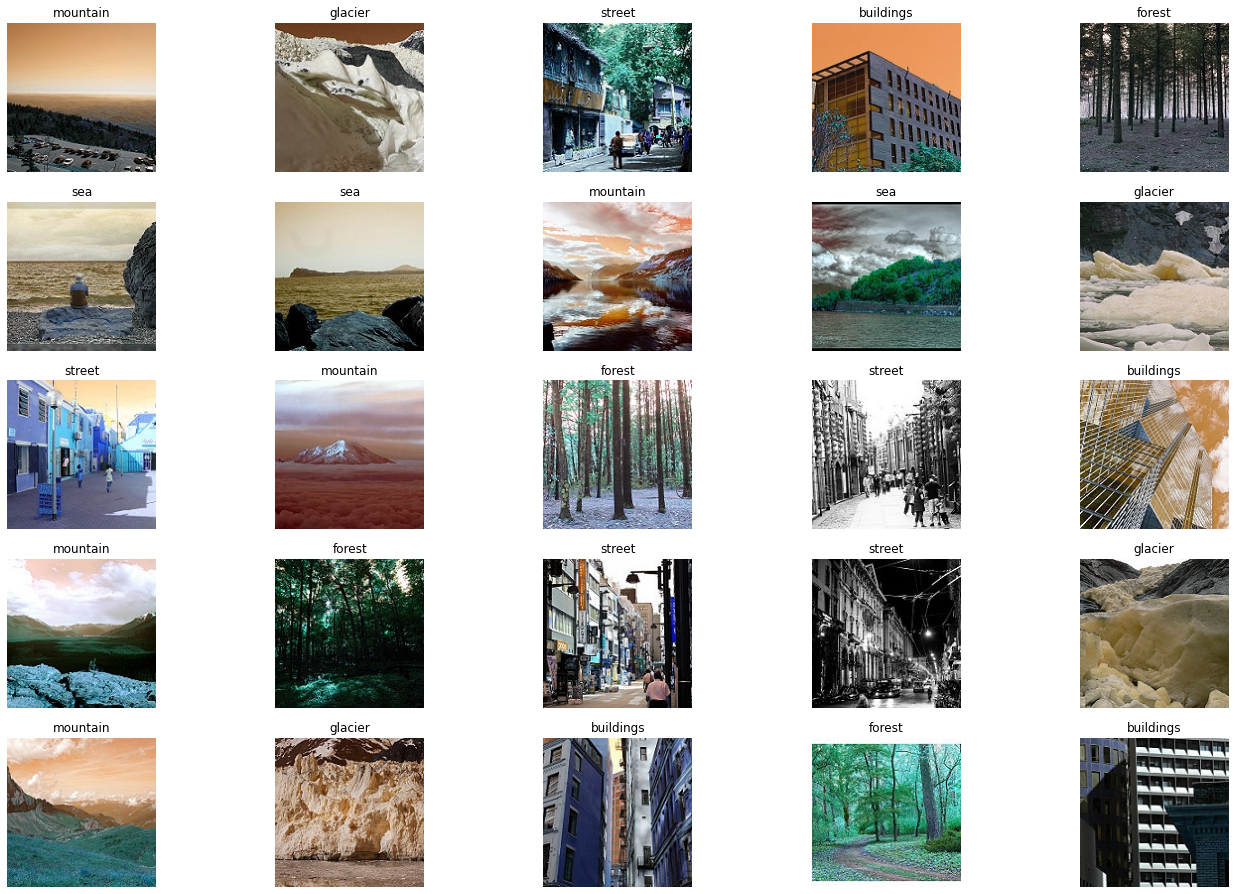

In [11]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [12]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
train_data = model.fit(Images,Labels,epochs=5,validation_split=0)

Epoch 1/5
439/439 [==============================] - 241s 549ms/step - loss: 1.1474 - accuracy: 0.5613
Epoch 2/5
439/439 [==============================] - 234s 534ms/step - loss: 0.9514 - accuracy: 0.6526
Epoch 3/5
439/439 [==============================] - 234s 534ms/step - loss: 0.8191 - accuracy: 0.7165
Epoch 4/5
439/439 [==============================] - 234s 533ms/step - loss: 0.7315 - accuracy: 0.7505
Epoch 5/5
439/439 [==============================] - 234s 533ms/step - loss: 0.6599 - accuracy: 0.7714


**Here we get 77 percent accuracy if we increase the epoch accuracy also increase**